•	For project 1, I will work on dataset of Baltimore public salary information compiled by Baltimore Sun Media Group for the year 2017.
https://www.baltimoresun.com/data/bal-public-salaries-archive-20150415-htmlstory.html

_Import all the required python packages_

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline           

In [3]:
df  = pd.read_csv('./cy2017-md.csv') #Read daraframe as variable df.

In [127]:
df.head() #To get first few rows of the dataframe

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date
0,JOHN,C,POLIKS,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,8096.0,68000.0,A,67000.0,3000.0,0.0,70000.0,0
1,JOSEPHINE,K,OBONYO,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,4849.0,64000.0,A,64000.0,0.0,0.0,64000.0,0
2,DARLENE,M,BENEDICT,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,4865.0,0.0,A,38000.0,0.0,12000.0,50000.0,9/30/17
3,LORI,J,MCFARLIN,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,7480.0,62000.0,A,61000.0,1000.0,2000.0,64000.0,0
4,ELWOOD,D,HALL,JR,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,7890.0,43000.0,A,43000.0,12000.0,1000.0,56000.0,0


In [128]:
df.info() # .info() function gives information like datatype, shape, null, etc. of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127840 entries, 0 to 127839
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          127839 non-null  object 
 1   middle_initial      103291 non-null  object 
 2   last_name           127834 non-null  object 
 3   suffix              3535 non-null    object 
 4   system              127839 non-null  object 
 5   agency              127839 non-null  float64
 6   organization        127839 non-null  object 
 7   subtitle            127839 non-null  object 
 8   class_code          127839 non-null  float64
 9   annual_salary       127839 non-null  float64
 10  pay_rate            127839 non-null  object 
 11  regular_earnings    127839 non-null  float64
 12  overtime_earnings   127839 non-null  float64
 13  other_earnings      127839 non-null  float64
 14  ytd_gross_earnings  127839 non-null  float64
 15  term_date           127839 non-nul

In [129]:
df.isnull().sum() #to check how many values in each column are null

first_name                 1
middle_initial         24549
last_name                  6
suffix                124305
system                     1
agency                     1
organization               1
subtitle                   1
class_code                 1
annual_salary              1
pay_rate                   1
regular_earnings           1
overtime_earnings          1
other_earnings             1
ytd_gross_earnings         1
term_date                  1
dtype: int64

<AxesSubplot:>

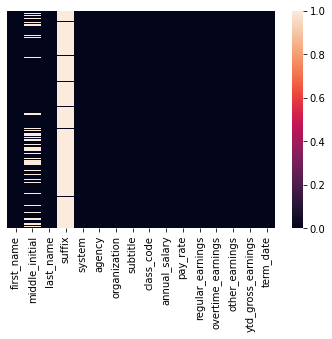

In [130]:
sns.heatmap(df.isnull(),yticklabels=False) #heatmap to show all nulls 

In [131]:
df.drop(['term_date','suffix'],axis = 1,inplace = True) #drop columns term_date and suffix because most values are NaN
df.shape

(127840, 14)

In [132]:
df['middle_initial'].fillna("Not Specified",inplace = True) #assigning "Not Specified" to NaN using .fillna() function.

In [133]:
df.dropna(inplace = True) #To drop remaining rows with NaN

In [134]:
df.isnull().sum()

first_name            0
middle_initial        0
last_name             0
system                0
agency                0
organization          0
subtitle              0
class_code            0
annual_salary         0
pay_rate              0
regular_earnings      0
overtime_earnings     0
other_earnings        0
ytd_gross_earnings    0
dtype: int64

_All Unique systems_

In [137]:
df['system'].unique()
#Regular Payroll Process or Contractual Payroll Process

array(['RG', 'UM', 'CT'], dtype=object)

_Number of unique agencies_

In [138]:
df['agency'].nunique()

243

_Number of unique organization_

In [139]:
df['organization'].nunique()

74

In [69]:
df['class_code'].nunique()

2649

_Richest Person in Maryland_

In [70]:
df[df['ytd_gross_earnings'] == df['ytd_gross_earnings'].max()]

,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings
90551,MARK,Not Specified,TURGEON,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,574000.0,A,563000.0,0.0,2157000.0,2720000.0


_Number of Millioniaries in Maryland_

In [71]:
sum(df['ytd_gross_earnings'] >= 1000000)

3

_Top 5 Reach persons in Maryland_

In [72]:
df.sort_values('ytd_gross_earnings',ascending=False).head(5)

,first_name,middle_initial,last_name,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings
90551,MARK,Not Specified,TURGEON,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,574000.0,A,563000.0,0.0,2157000.0,2720000.0
88425,DANIEL,J,DURKIN,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,500000.0,A,499000.0,0.0,1996000.0,2494000.0
90291,BRENDA,S,FRESE,UM,360222.0,UNIVERSITY OF MARYLAND,360222-UMCP,1212.0,524000.0,A,509000.0,0.0,670000.0,1180000.0
72965,STEPHEN,T,BARTLETT,UM,360221.0,UNIVERSITY OF MARYLAND,360221-UMB,1212.0,615000.0,A,626000.0,0.0,325000.0,951000.0
73708,JAY,A,PERMAN,UM,360221.0,UNIVERSITY OF MARYLAND,360221-UMB,1212.0,860000.0,A,858000.0,0.0,88000.0,945000.0


_Number of People with zero income_

In [73]:
sum(df['ytd_gross_earnings'] == 0)

3596

_Organization With hieghest number employees_

In [74]:
df['organization'].value_counts().head(5)

UNIVERSITY OF MARYLAND            34666
STATE UNIVERSITIES & COLLEGES     19152
MARYLAND DEPARTMENT OF HEALTH     11779
DEPARTMENT OF TRANSPORTATION       8663
DEPT OF PUB SAFETY & COR SERVS     7894
Name: organization, dtype: int64

_Highest earning employee from university of Maryland_

In [75]:
df[(df['organization']=='UNIVERSITY OF MARYLAND') & (df['ytd_gross_earnings']>1000000)].value_counts()

first_name  middle_initial  last_name  system  agency    organization            subtitle     class_code  annual_salary  pay_rate  regular_earnings  overtime_earnings  other_earnings  ytd_gross_earnings
BRENDA      S               FRESE      UM      360222.0  UNIVERSITY OF MARYLAND  360222-UMCP  1212.0      524000.0       A         509000.0          0.0                670000.0        1180000.0             1
DANIEL      J               DURKIN     UM      360222.0  UNIVERSITY OF MARYLAND  360222-UMCP  1212.0      500000.0       A         499000.0          0.0                1996000.0       2494000.0             1
MARK        Not Specified   TURGEON    UM      360222.0  UNIVERSITY OF MARYLAND  360222-UMCP  1212.0      574000.0       A         563000.0          0.0                2157000.0       2720000.0             1
dtype: int64

_To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function._

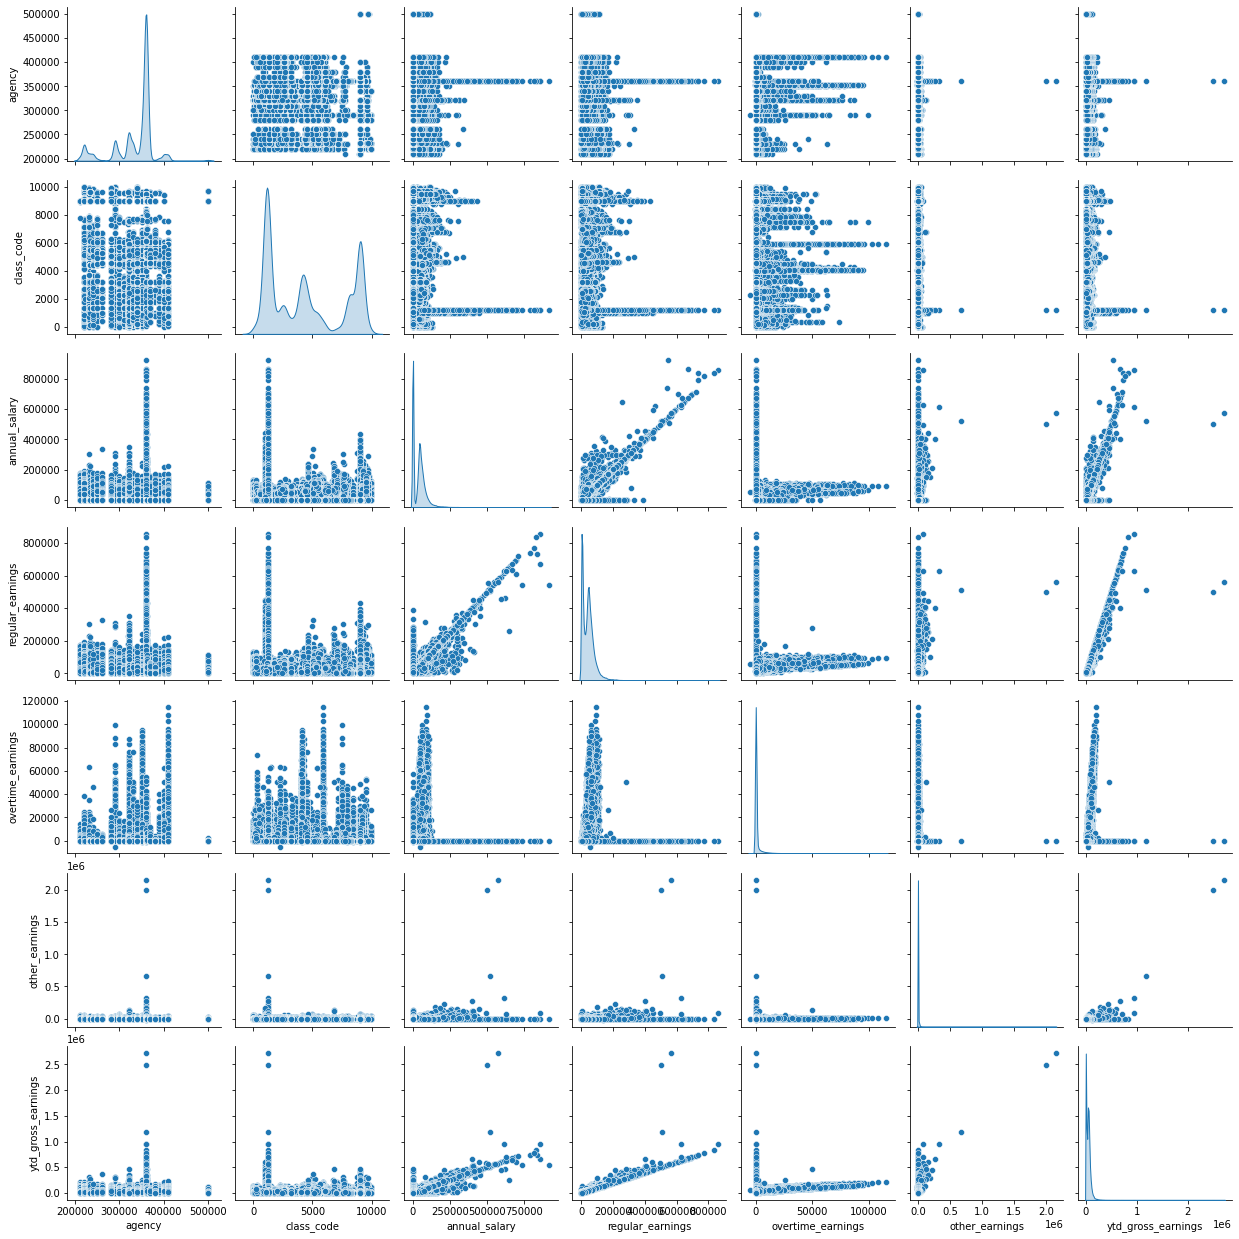

In [76]:
sns.pairplot(df,diag_kind = 'kde')

_Number of people in different pay_rate groups using seaborn package_

<AxesSubplot:xlabel='pay_rate', ylabel='count'>

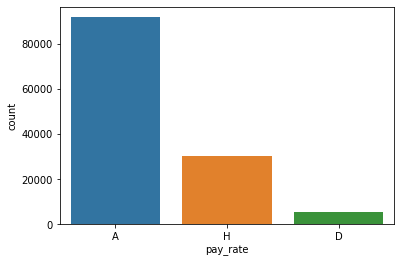

In [77]:
sns.countplot(x='pay_rate',data=df)

In [145]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import cufflinks as cf      #For interactive visuals
# init_notebook_mode(connected=True)
# cf.go_offline()

In [144]:
#May be because of huge dataset this cell is not giving any response in my system
#  df.iplot(kind='bar',x='pay_rate')
# df[['regular_earnings','overtime_earnings']].iplot(kind='spread')

_heatplot allows to plot data as color-encoded matrices which is used to find relation, cluster between the data_

Text(0.5, 1.0, 'dataframe')

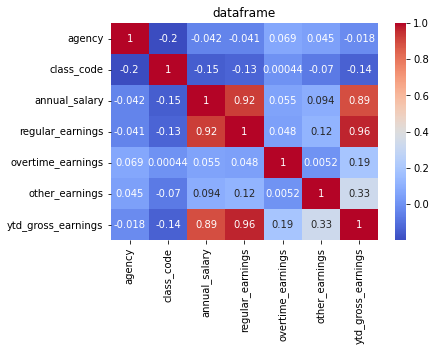

In [4]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('dataframe')

_histplot to show annual salary of people in Maryland_

<AxesSubplot:xlabel='annual_salary', ylabel='Count'>

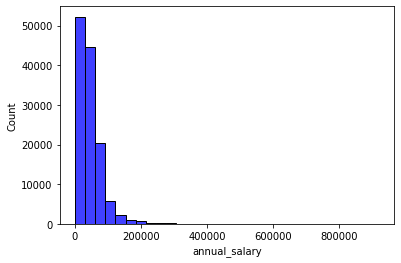

In [142]:
sns.histplot(df['annual_salary'],bins=30,kde=False,color='blue')

_Number of people in each system_

In [91]:
df['system'].value_counts()

RG    67824
UM    34666
CT    25343
Name: system, dtype: int64

_boxplot lot to display properties like minimum, quartiles, median and maximum of annual salary in different system_

<AxesSubplot:xlabel='system', ylabel='annual_salary'>

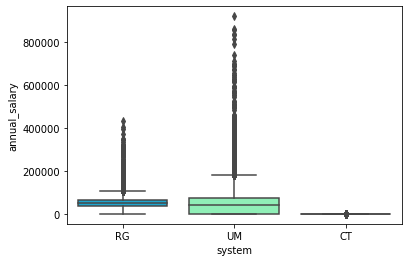

In [117]:
sns.boxplot(x='system',y='annual_salary',data=df,palette='rainbow')

_To Compare various earnings_

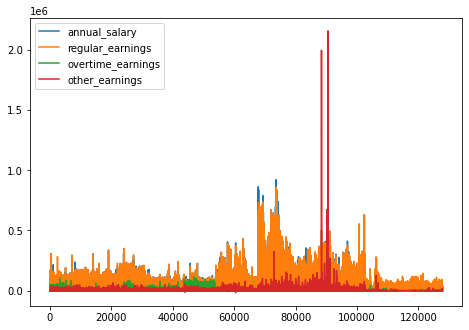

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(df['annual_salary'],label="annual_salary")
ax.plot(df['regular_earnings'],label="regular_earnings")
ax.plot(df['overtime_earnings'],label="overtime_earnings")
ax.plot(df['other_earnings'],label="other_earnings")
ax.legend(loc=2) #legend location to the uper left side